In [41]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder


In [42]:
df=pd.read_csv("C:/Users/Ayaan/Downloads/autodata.csv")
df

,Unnamed: 0,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Low,0,1
1,1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Low,0,1
2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,2,164,audi,std,four,sedan,fwd,front,99.8,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Low,0,1
4,4,2,164,audi,std,four,sedan,4wd,front,99.4,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Low,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,196,-1,95,volvo,std,four,sedan,rwd,front,109.1,...,9.5,114.0,5400.0,23,28,16845.0,10.217391,Low,0,1
197,197,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,...,8.7,160.0,5300.0,19,25,19045.0,12.368421,Medium,0,1
198,198,-1,95,volvo,std,four,sedan,rwd,front,109.1,...,8.8,134.0,5500.0,18,23,21485.0,13.055556,Medium,0,1
199,199,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,...,23.0,106.0,4800.0,26,27,22470.0,9.038462,Low,1,0


In [5]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Unnamed: 0           0
symboling            0
normalized-losses    0
make                 0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               4
compression-ratio    0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                0
city-L/100km         0
horsepower-binned    2
diesel               0
gas                  0
dtype: int64


In [6]:
# Get initial statistics
df.describe()

,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,199.000000,199.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,100.000000,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.396985,5117.587940,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,58.167861,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.553843,480.521824,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,0.000000,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,50.000000,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,100.000000,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,150.000000,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,200.000000,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


In [7]:
df.shape

(201, 30)

In [8]:
df.dtypes

Unnamed: 0             int64
symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object

In [9]:
df['horsepower'].dtype

dtype('float64')

In [40]:
Mean = df['horsepower'].mean()
df['horsepower'] = df['horsepower'].fillna(Mean)

In [11]:
df['horsepower'].isnull().sum()

0

In [12]:
df['horsepower'] = df['horsepower'].astype(int)

In [13]:
df['horsepower'].dtype

dtype('int32')

In [14]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Apply Label Encoding to all categorical columns
label_encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

In [15]:
df.dtypes

Unnamed: 0             int64
symboling              int64
normalized-losses      int64
make                   int32
aspiration             int32
num-of-doors           int32
body-style             int32
drive-wheels           int32
engine-location        int32
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type            int32
num-of-cylinders       int32
engine-size            int64
fuel-system            int32
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int32
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned      int32
diesel                 int64
gas                    int64
dtype: object

In [16]:
df.head()

,Unnamed: 0,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,3,122,0,0,1,0,2,0,88.6,...,9.0,111,5000.0,21,27,13495.0,11.190476,1,0,1
1,1,3,122,0,0,1,0,2,0,88.6,...,9.0,111,5000.0,21,27,16500.0,11.190476,1,0,1
2,2,1,122,0,0,1,2,2,0,94.5,...,9.0,154,5000.0,19,26,16500.0,12.368421,2,0,1
3,3,2,164,1,0,0,3,1,0,99.8,...,10.0,102,5500.0,24,30,13950.0,9.791667,1,0,1
4,4,2,164,1,0,0,3,0,0,99.4,...,8.0,115,5500.0,18,22,17450.0,13.055556,1,0,1


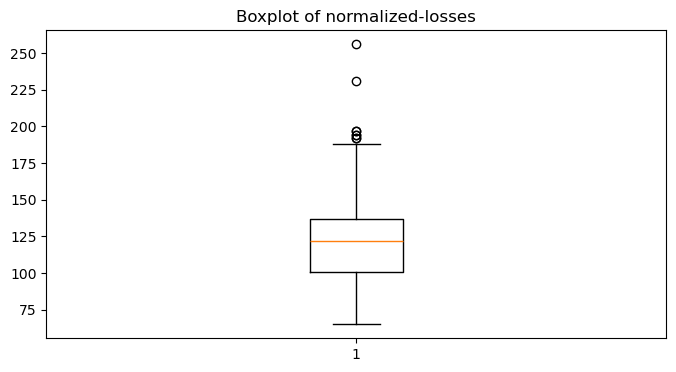

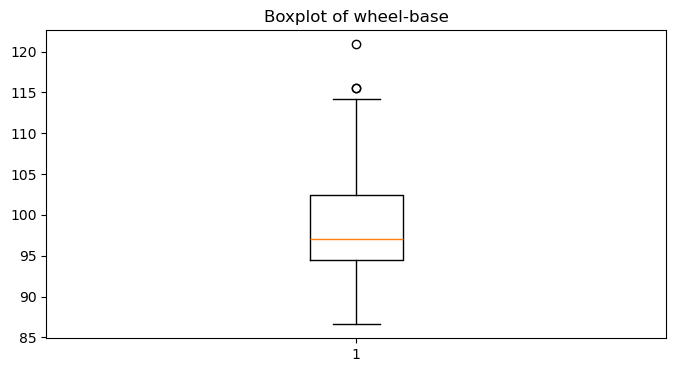

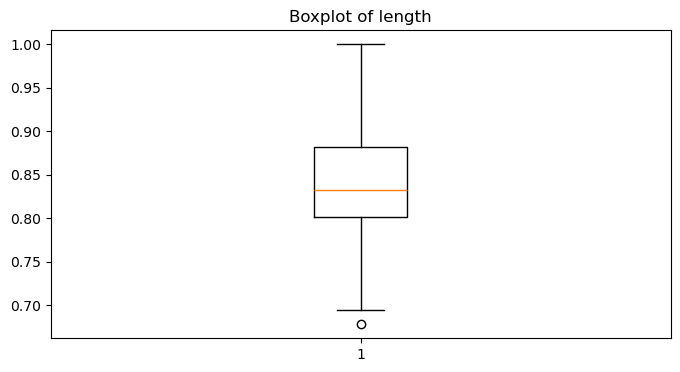

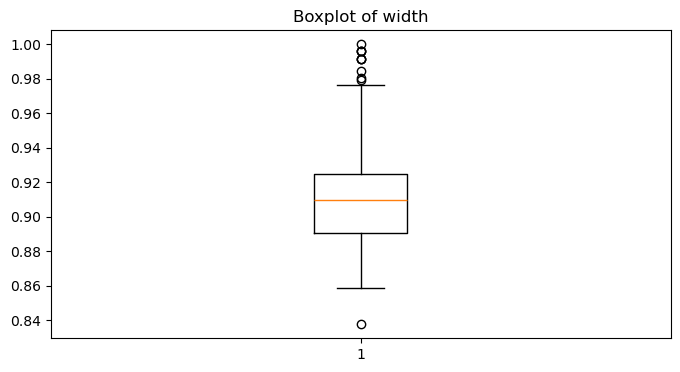

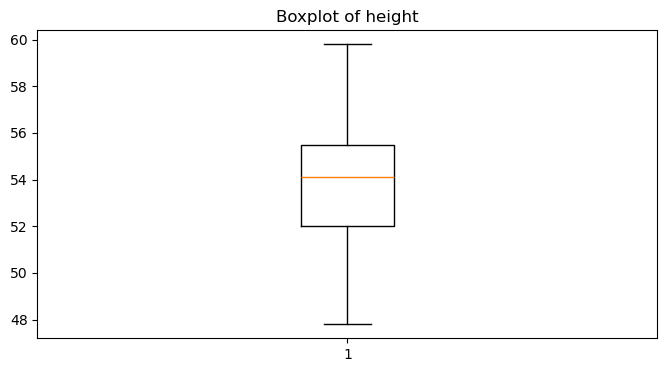

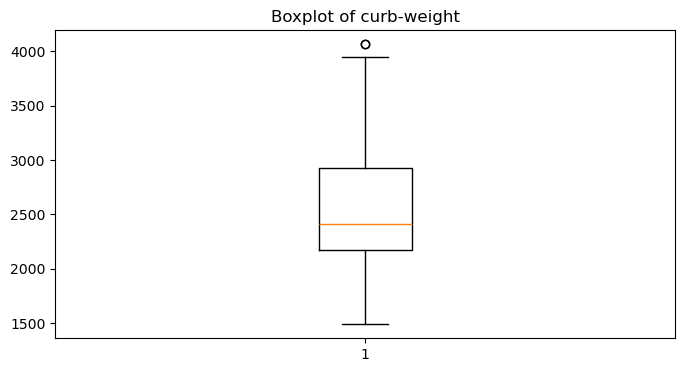

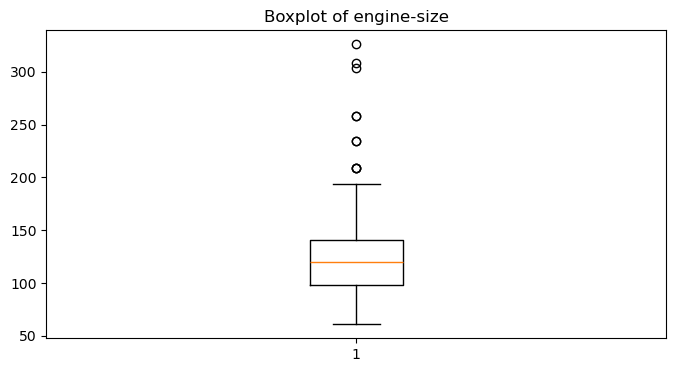

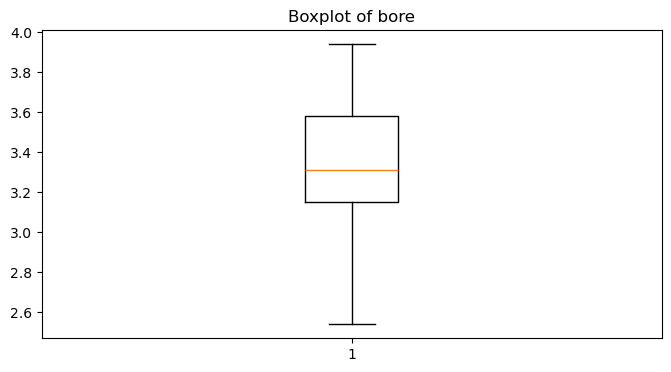

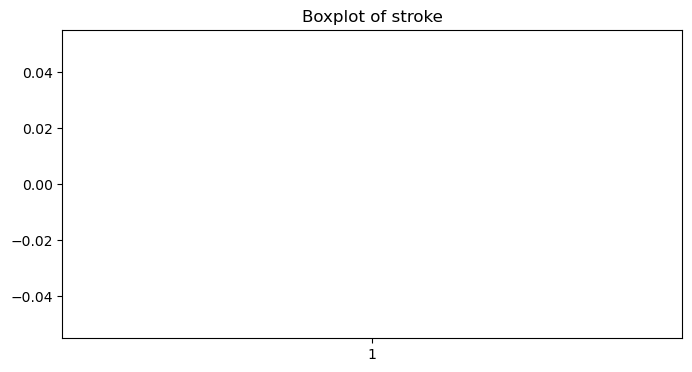

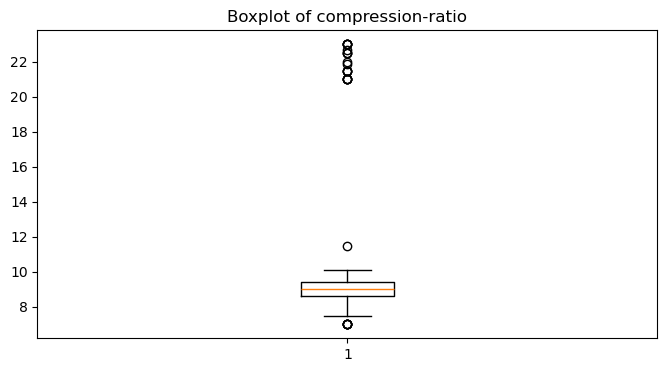

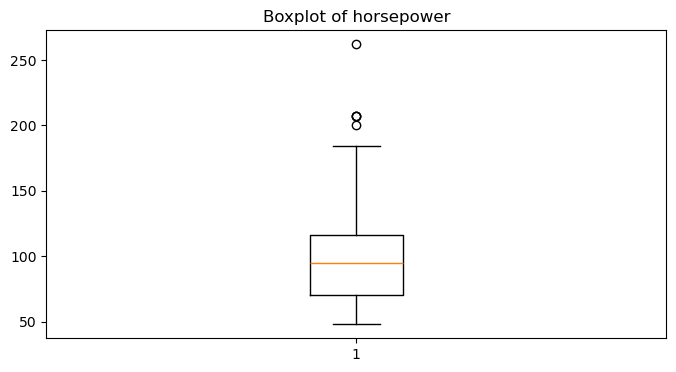

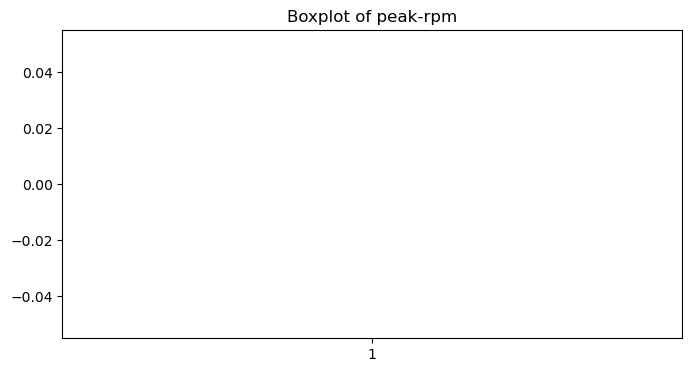

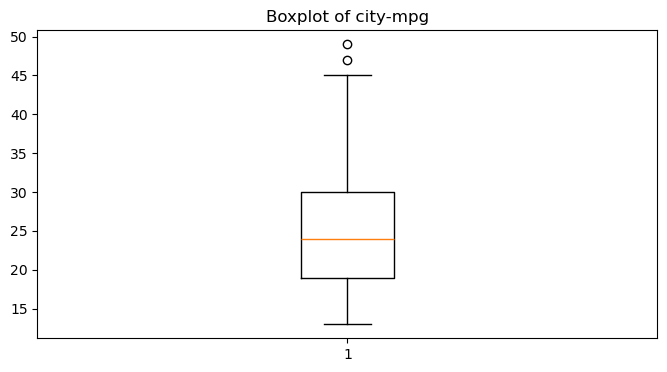

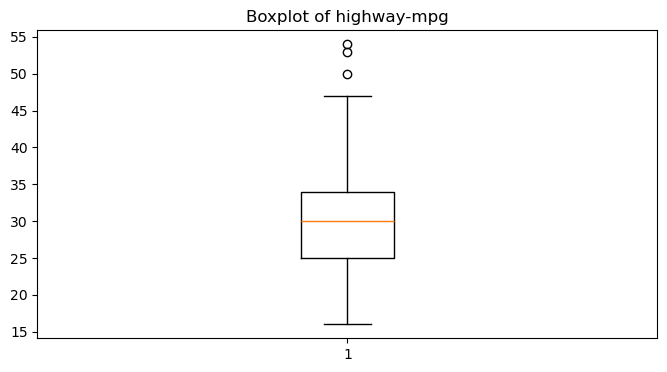

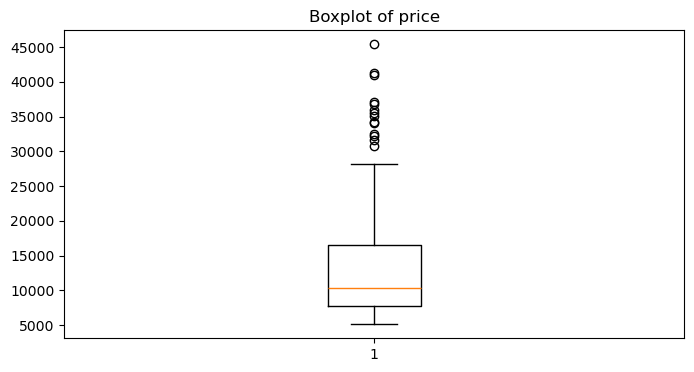

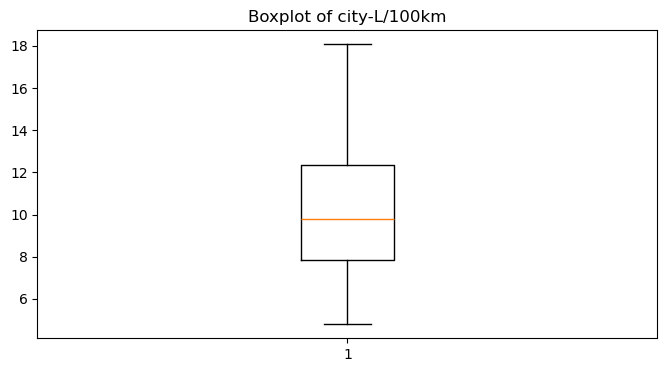

In [17]:
# Exclude categorical and identifier columns
selected_columns = ['normalized-losses', 'wheel-base', 'length', 'width', 'height',
                    'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio',
                    'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price', 'city-L/100km']

# Generate boxplots
for col in selected_columns:
    plt.figure(figsize=(8, 4))
    plt.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


In [9]:
# List of selected columns for outlier removal
selected_columns = ['normalized-losses', 'wheel-base', 'length', 'width', 'height',
                    'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio',
                    'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price', 'city-L/100km']

# Loop through each column and remove outliers
for col in selected_columns:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1  # Interquartile Range
    
    # Define the bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter out the outliers
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Display the cleaned dataframe
print("Dataframe after removing outliers:")
df

Dataframe after removing outliers:


,Unnamed: 0,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Low,0,1
1,1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Low,0,1
2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,2,164,audi,std,four,sedan,fwd,front,99.8,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Low,0,1
4,4,2,164,audi,std,four,sedan,4wd,front,99.4,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Low,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,192,-2,103,volvo,std,four,sedan,rwd,front,104.3,...,9.5,114.0,5400.0,24,28,15985.0,9.791667,Low,0,1
193,193,-1,74,volvo,std,four,wagon,rwd,front,104.3,...,9.5,114.0,5400.0,24,28,16515.0,9.791667,Low,0,1
196,196,-1,95,volvo,std,four,sedan,rwd,front,109.1,...,9.5,114.0,5400.0,23,28,16845.0,10.217391,Low,0,1
197,197,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,...,8.7,160.0,5300.0,19,25,19045.0,12.368421,Medium,0,1


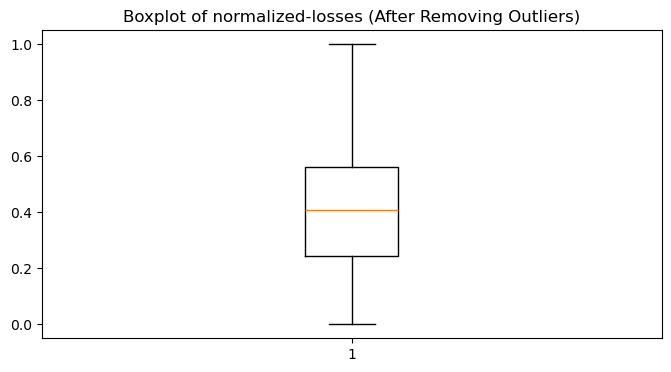

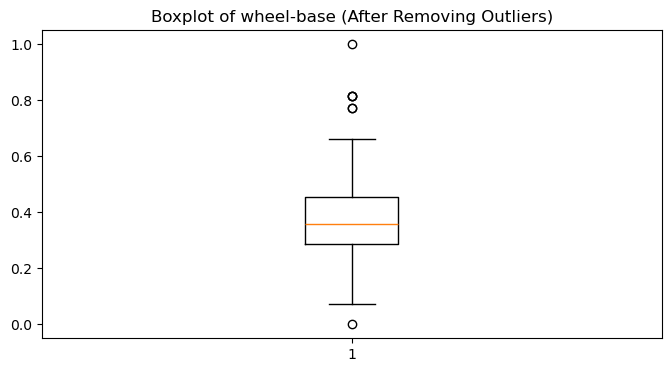

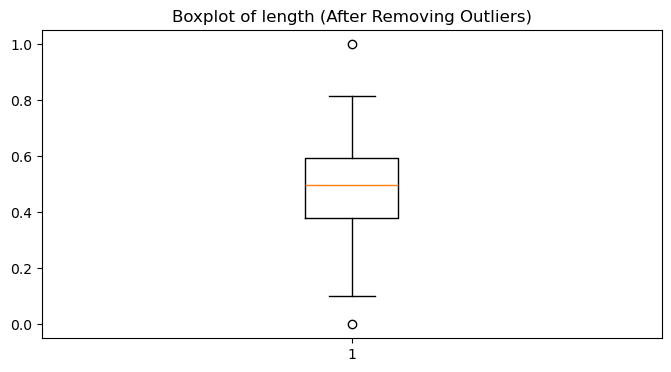

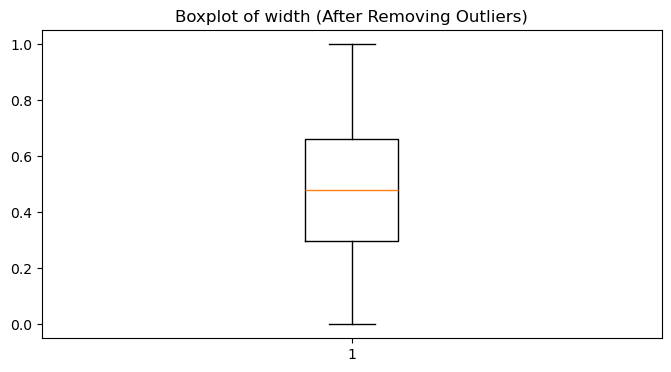

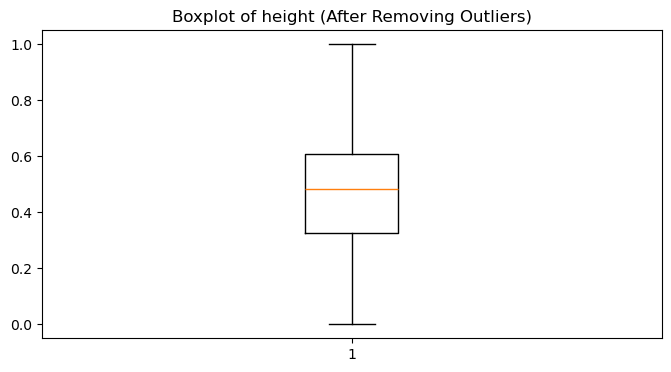

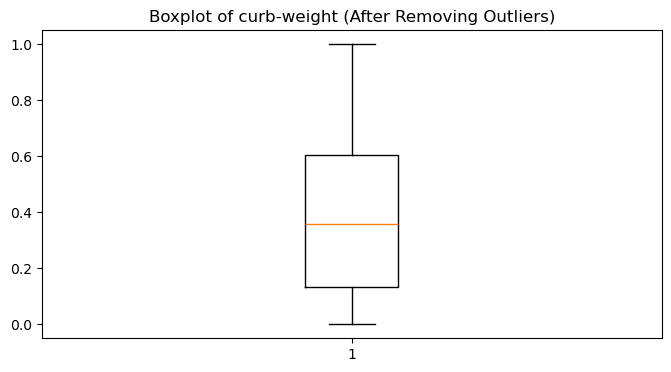

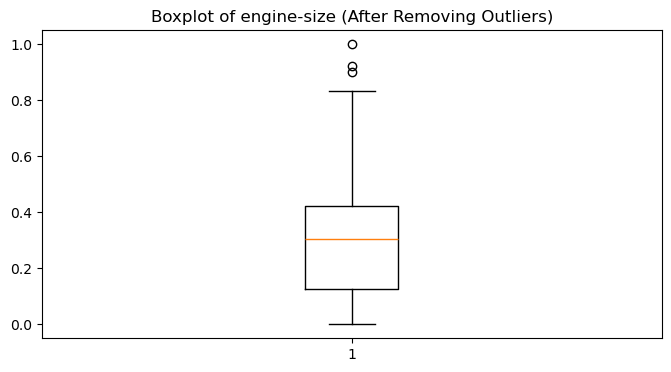

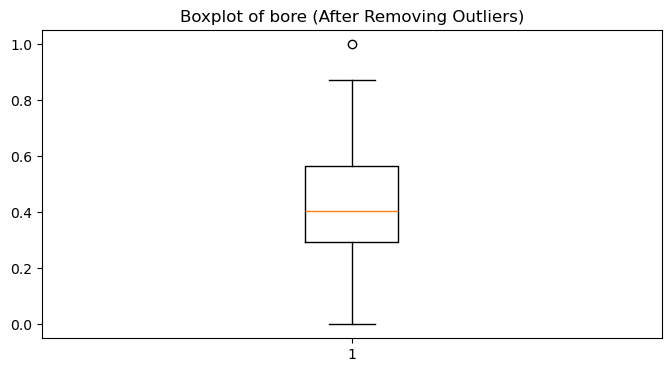

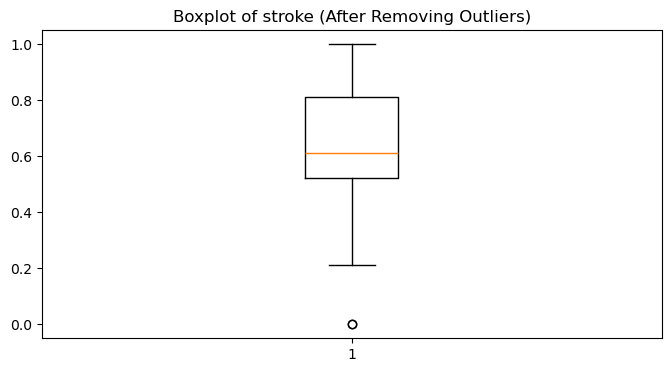

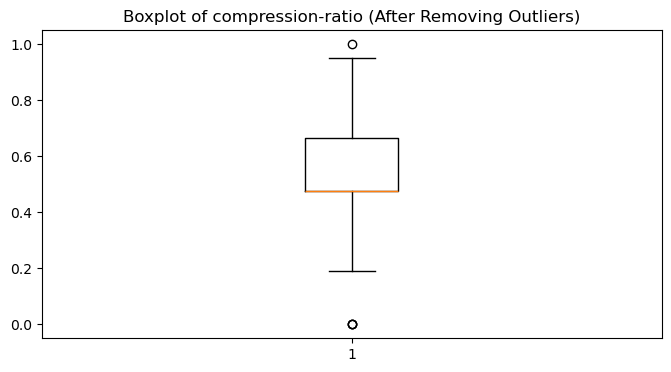

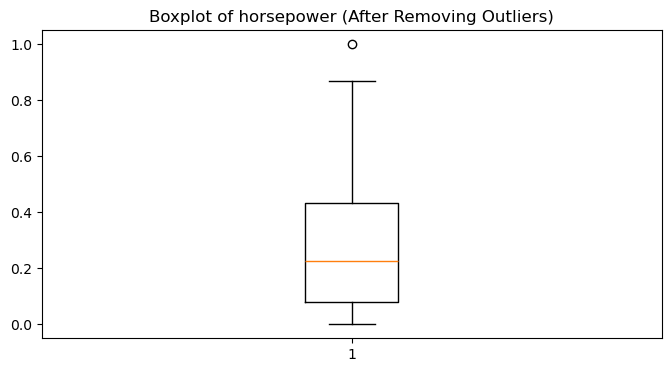

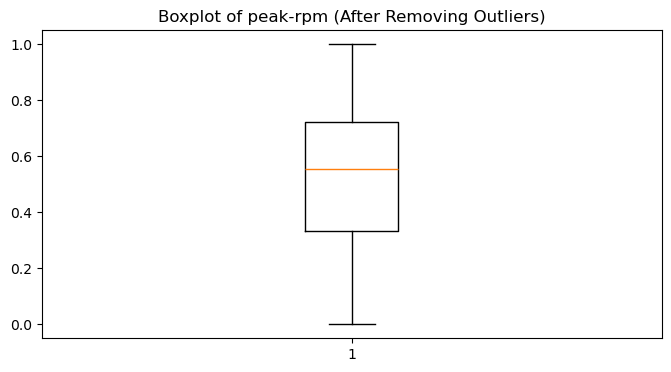

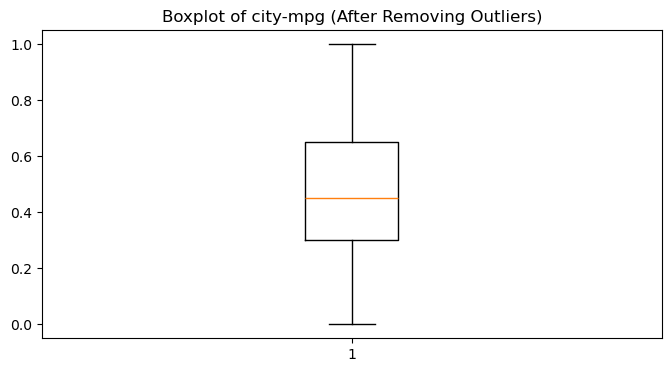

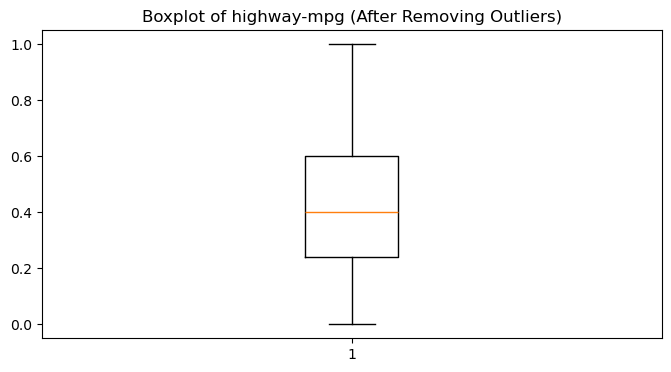

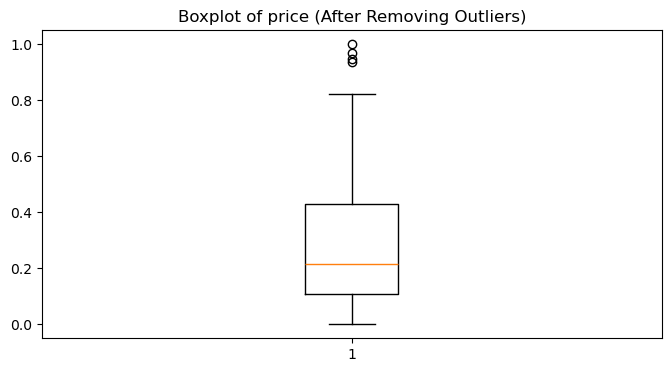

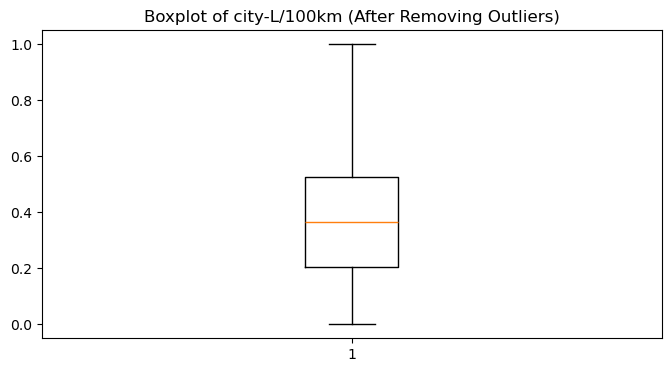

In [24]:
# After removing outliers, generate boxplots for selected columns again
for col in selected_columns:
    plt.figure(figsize=(8, 4))
    plt.boxplot(df[col])
    plt.title(f'Boxplot of {col} (After Removing Outliers)')
    plt.show()


In [10]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply Standardization to the selected numerical columns
standardized_data = scaler.fit_transform(df[selected_columns])

# Convert the standardized data back to a dataframe and assign it to the original dataframe
df[selected_columns] = standardized_data

# Display the dataframe after standardization
print("Data after Standardization (Z-score Normalization):")

df

Data after Standardization (Z-score Normalization):


,Unnamed: 0,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,3,0.184641,alfa-romero,std,two,convertible,rwd,front,-1.981850,...,-0.136718,0.731456,-0.425513,-1.120349,-1.077307,0.761908,1.130772,Low,0,1
1,1,3,0.184641,alfa-romero,std,two,convertible,rwd,front,-1.981850,...,-0.136718,0.731456,-0.425513,-1.120349,-1.077307,1.478093,1.130772,Low,0,1
2,2,1,0.184641,alfa-romero,std,two,hatchback,rwd,front,-0.677378,...,-0.136718,2.348445,-0.425513,-1.515355,-1.271774,1.478093,1.782265,Medium,0,1
3,3,2,1.664885,audi,std,four,sedan,fwd,front,0.494435,...,2.387642,0.393016,0.826647,-0.527840,-0.493909,0.870349,0.357125,Low,0,1
4,4,2,1.664885,audi,std,four,sedan,4wd,front,0.405997,...,-2.661077,0.881873,0.826647,-1.712857,-2.049638,1.704507,2.162302,Low,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,192,-2,-0.484994,volvo,std,four,sedan,rwd,front,1.489372,...,1.125462,0.844269,0.576215,-0.527840,-0.882841,1.355352,0.357125,Low,0,1
193,193,-1,-1.507067,volvo,std,four,wagon,rwd,front,1.489372,...,1.125462,0.844269,0.576215,-0.527840,-0.882841,1.481668,0.357125,Low,0,1
196,196,-1,-0.766945,volvo,std,four,sedan,rwd,front,2.550637,...,1.125462,0.844269,0.576215,-0.725343,-0.882841,1.560317,0.592583,Low,0,1
197,197,-1,-0.766945,volvo,turbo,four,sedan,rwd,front,2.550637,...,-0.894025,2.574071,0.325783,-1.515355,-1.466240,2.084645,1.782265,Medium,0,1


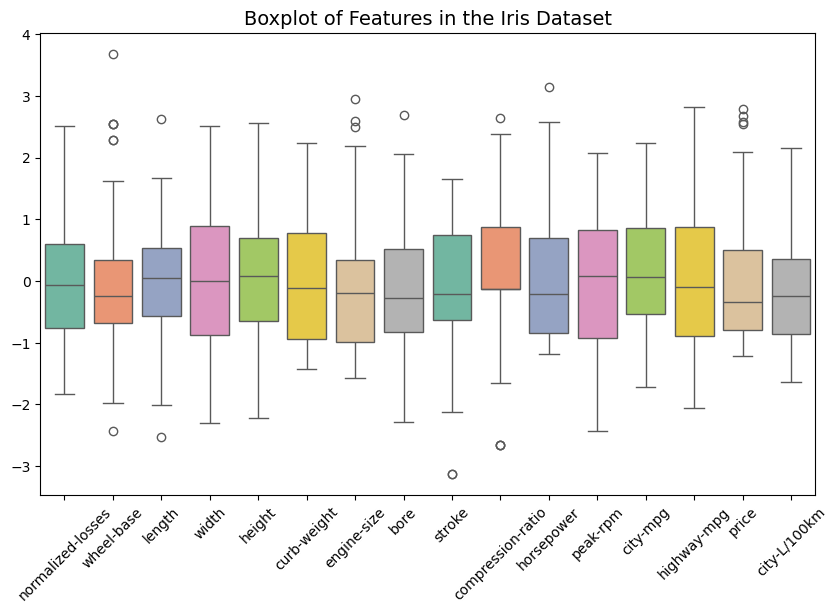

In [39]:
selected_columns = ['normalized-losses','wheel-base','length','width','height',
                    'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio',
                    'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price', 'city-L/100km']
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[selected_columns], palette="Set2")
plt.xticks(rotation=45)


plt.title("Boxplot of Features in the Iris Dataset", fontsize=14)
plt.show()